In [47]:
import pandas as pd
import numpy as np
import openpyxl
import warnings
warnings.filterwarnings(action='ignore')

In [51]:
data = pd.read_excel('sooldata_nice.xlsx', engine='openpyxl')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   주문번호    261 non-null    object        
 1   주문일     261 non-null    datetime64[ns]
 2   주문확정일   261 non-null    datetime64[ns]
 3   주문자ID   261 non-null    object        
 4   상품      261 non-null    object        
 5   주문상태값   261 non-null    object        
 6   수량      261 non-null    int64         
 7   최종결제금액  261 non-null    int64         
 8   생년월일    231 non-null    datetime64[ns]
 9   성별      231 non-null    object        
 10  나이      231 non-null    float64       
 11  구매누적수   261 non-null    int64         
 12  총 구매수량  261 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(6)
memory usage: 26.6+ KB


In [52]:
data.drop(columns=['생년월일','총 구매수량','상품'], axis=1, inplace=True)

In [55]:
data.rename(columns={'구매누적수':'총구매누적수량'}, inplace=True)

In [57]:
#금액에 천단위 콤마 넣기
data['최종결제금액'] = data['최종결제금액'].apply(lambda int_num: '{:,}'.format(int_num))

In [58]:
data.drop(columns=['주문상태값'], axis=1, inplace=True)
data.rename(columns={'주문확정일':'구매확정일'}, inplace=True)

In [59]:
data.rename(columns={'수량':'상품 당 구매수량'}, inplace=True)
data['나이'].fillna('39', inplace=True)
data['성별'].fillna('남', inplace=True)

In [60]:
data.isnull().sum()

주문번호         0
주문일          0
구매확정일        0
주문자ID        0
상품 당 구매수량    0
최종결제금액       0
성별           0
나이           0
총구매누적수량      0
dtype: int64

In [61]:
data['나이'] = data['나이'].astype(int)

In [63]:
data[['상품 당 구매수량','나이','총구매누적수량']].describe().round(0)

,상품 당 구매수량,나이,총구매누적수량
count,261.0,261.0,261.0
mean,2.0,42.0,3.0
std,1.0,10.0,4.0
min,1.0,26.0,1.0
25%,1.0,34.0,1.0
50%,1.0,39.0,2.0
75%,2.0,47.0,4.0
max,6.0,83.0,38.0


## Visualization

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
rc('font', family='Malgun Gothic')

data['성별'].value_counts()

성별
남    168
여     93
Name: count, dtype: int64

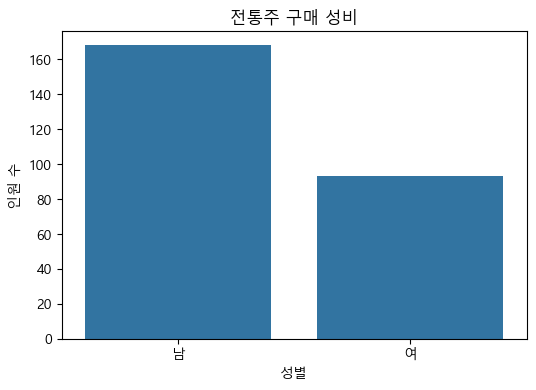

In [65]:
#전통주 구매 남녀 성비
plt.figure(figsize=(6,4))
sns.countplot(x=data['성별'])
plt.xlabel('성별')
plt.ylabel('인원 수')
plt.title('전통주 구매 성비')

plt.show()

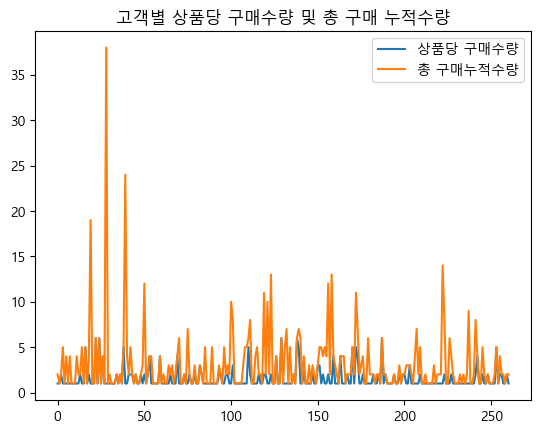

In [66]:
#고객별 상품 당 구매수량 및 총 누적 구매수량
#x축에 고객 구분번호, y축에 상품 당 구매수량
#x축에 고객 구분번호, y축에 총 누적 구매수량

plt.plot(data['상품 당 구매수량'], label='상품당 구매수량')
plt.plot(data['총구매누적수량'], label='총 구매누적수량')
plt.title('고객별 상품당 구매수량 및 총 구매 누적수량')
plt.legend()

plt.show()

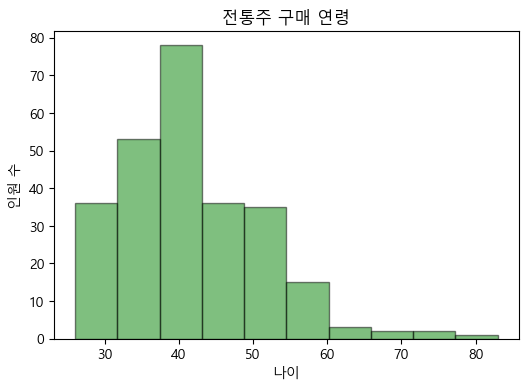

In [68]:
#전통주 구매 연령대
plt.figure(figsize=(6,4))

plt.hist(data['나이'], color='g', edgecolor='k', alpha=0.5, bins=10)
plt.title('전통주 구매 연령')

plt.xlabel('나이')
plt.ylabel('인원 수')

plt.show()

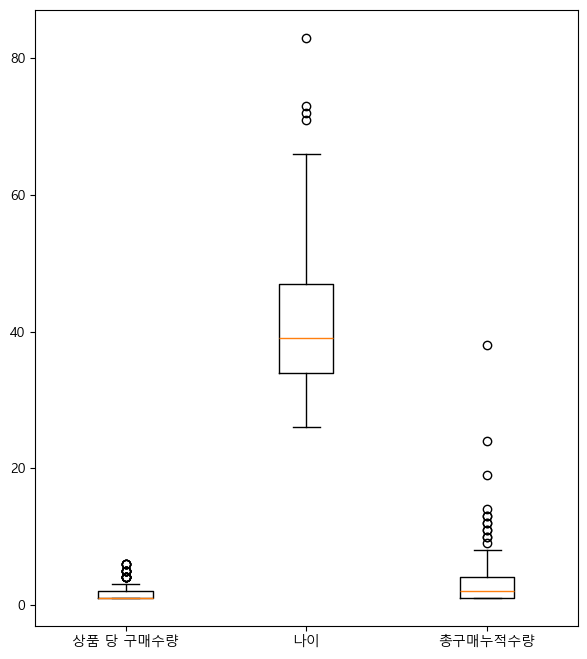

In [69]:
plt.figure(figsize=(7,8))
plt.boxplot(data[['상품 당 구매수량','나이','총구매누적수량']], labels=['상품 당 구매수량','나이','총구매누적수량']) 
plt.show()